# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sea
from sklearn.model_selection import train_test_split


In [2]:
Train=pd.read_csv("tested2.csv", encoding='ISO-8859-1')

In [3]:
Train.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
Train.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Exploratory Data Analysis by checking out missing data

In [5]:
Train.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
total=Train.shape
print("Rows:",total[0],"colums:",total[1] )

Rows: 15509 colums: 10


In [7]:
genres=Train["Genre"].unique()
print("Unique genres:",genres)

Unique genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [8]:
Train.drop_duplicates(inplace=True)

In [9]:
Identities=["Name","Year","Duration","Votes","Rating"]
Train.dropna(subset=Identities,inplace=True)
Missing=Train.isnull().sum()

In [10]:
print(Missing)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [11]:
Movie_rating=Train[["Name","Rating"]]


In [12]:
print(Movie_rating)

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5851 rows x 2 columns]


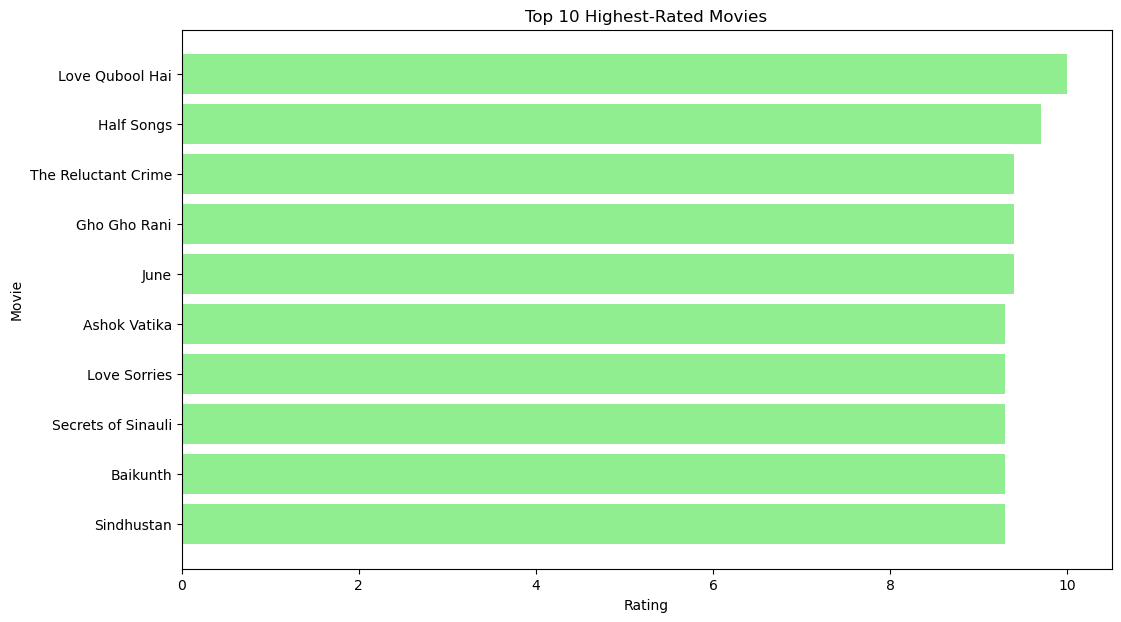

In [13]:
Top_movies=Train.sort_values(by = "Rating", ascending = False).head(10)

pt.figure(figsize=(12, 7))

pt.barh(Top_movies["Name"], Top_movies["Rating"], color = "lightgreen")

pt.xlabel("Rating") 

pt.ylabel("Movie") 
pt.title("Top 10 Highest-Rated Movies")

pt.gca().invert_yaxis()



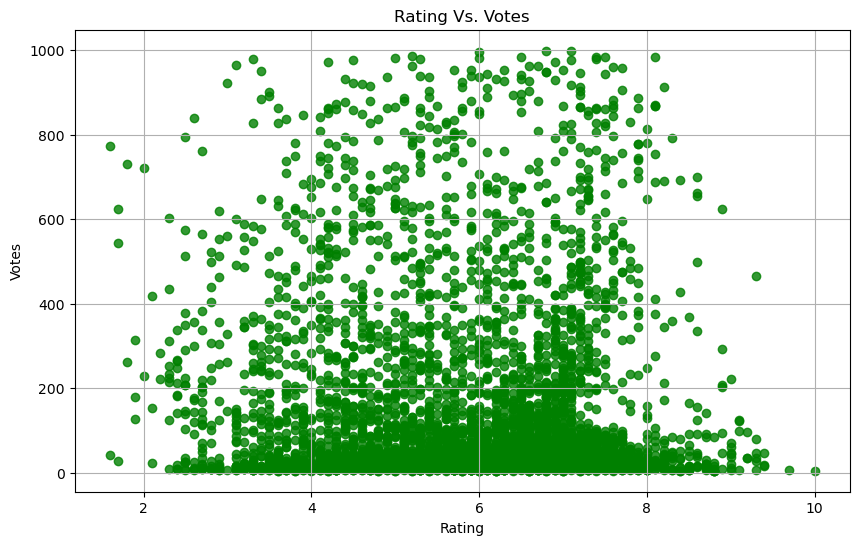

In [14]:
Train["Votes"]=pd.to_numeric(Train["Votes"],errors="coerce")

pt.figure(figsize=(10, 6))

pt.scatter(Train["Rating"], Train["Votes"], alpha=0.8, color="green")

pt.xlabel("Rating")

pt.ylabel("Votes")

pt.title("Rating Vs. Votes")

pt.grid(True)



Text(0.5, 1.0, 'Top 10 Actors by Number of Movies Performed')

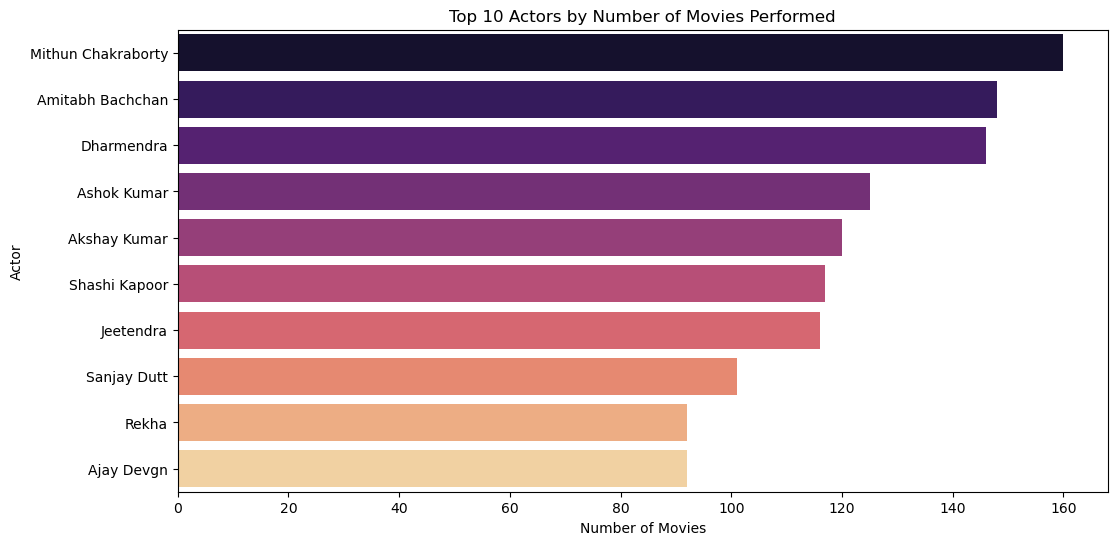

In [15]:
Actors= pd.concat([Train["Actor 1"],Train[ "Actor 2"], Train["Actor 3"]])

counts=Actors.value_counts().reset_index()

counts.columns=["Actor", "Number of Movies"]

pt.figure(figsize=(12, 6))

sea.barplot(x="Number of Movies", y="Actor", data=counts.head (10), palette ="magma")

pt.xlabel("Number of Movies")

pt.ylabel("Actor")

pt.title("Top 10 Actors by Number of Movies Performed")

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


Text(0.5, 1, 'Pair Plot of voting, Rating, Duration, and Year')

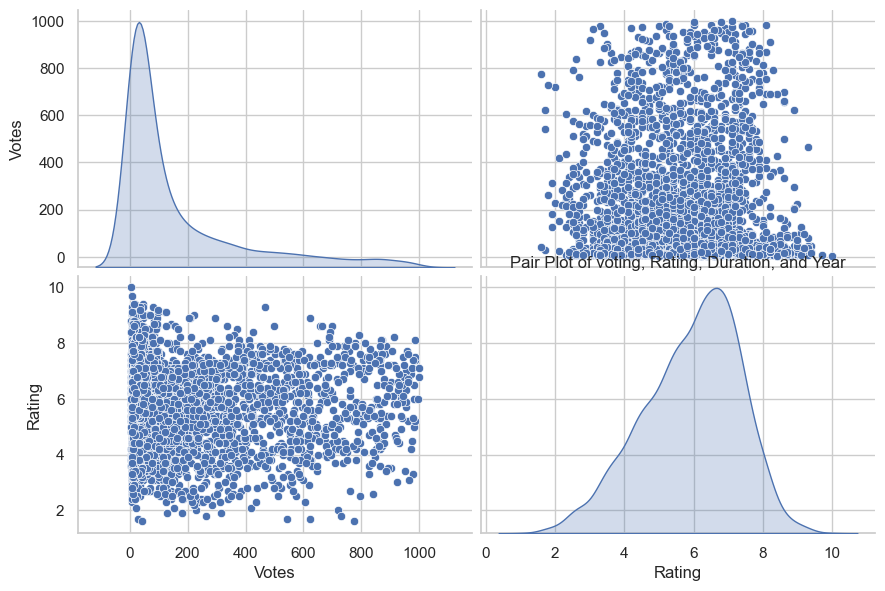

In [16]:
Interest=["Votes", "Rating", "Duration", "Year"] 
sea.set(style = "whitegrid")
sea.pairplot(Train[Interest], diag_kind = "kde", markers="o", palette = "magma", height =3, aspect = 1.5,) 
pt.title("Pair Plot of voting, Rating, Duration, and Year", y = 1)


Text(0.5, 1.0, 'Correlation Heatmap')

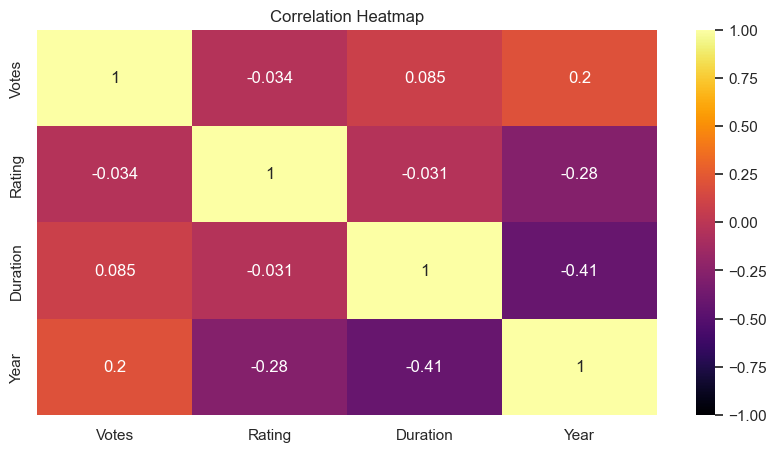

In [36]:
Cols=["Votes", "Rating", "Duration", "Year"]

correlation_matrix = Train[Cols].corr()

pt.figure(figsize=(10,5))

sea.heatmap(correlation_matrix, annot = True, cmap ="inferno", vmin = -1, vmax = 1)

pt.title("Correlation Heatmap")

# Logistic Regression Model(Building)

In [22]:
Sort=Train.sort_values(by="Votes", ascending=False)

Sort["Vote_Count_P"]=Sort["Votes"].rank(pct=True)*100

Sort.reset_index(drop = True, inplace = True)


In [23]:
print(Sort[["Votes","Name","Vote_Count_P"]])

      Votes                                  Name  Vote_Count_P
0     999.0  Satyam Shivam Sundaram: Love Sublime    100.000000
1     998.0                            Hera Pheri     99.977689
2     996.0                           Kurukshetra     99.955377
3     986.0                           Dishkiyaoon     99.933066
4     985.0                            Kadvi Hawa     99.899598
...     ...                                   ...           ...
5846    NaN                                 Ziddi           NaN
5847    NaN                        Zila Ghaziabad           NaN
5848    NaN                                 Zinda           NaN
5849    NaN              Zindagi Na Milegi Dobara           NaN
5850    NaN                              Zubeidaa           NaN

[5851 rows x 3 columns]


In [24]:
Train=Train.dropna(subset=["Votes"])

In [25]:
Train.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [26]:
Train=Train.dropna()

In [27]:
Train["Year"] = Train["Year"].astype(str) 
Train["Duration"]=Train["Duration"].astype(str)

Train["Year"] = Train["Year"].str.extract("(\d+)").astype(float)

Train ["Duration"] = Train["Duration"].str.extract("(\d+)").astype(float)

x=Train[["Year", "Duration", "Votes"]]

y=Train['Rating']
x_train, x_test, y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=52)


# Training And Prediction

In [34]:
from sklearn.linear_model import LinearRegression

In [28]:
Model=LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred=Model.predict(x_test)

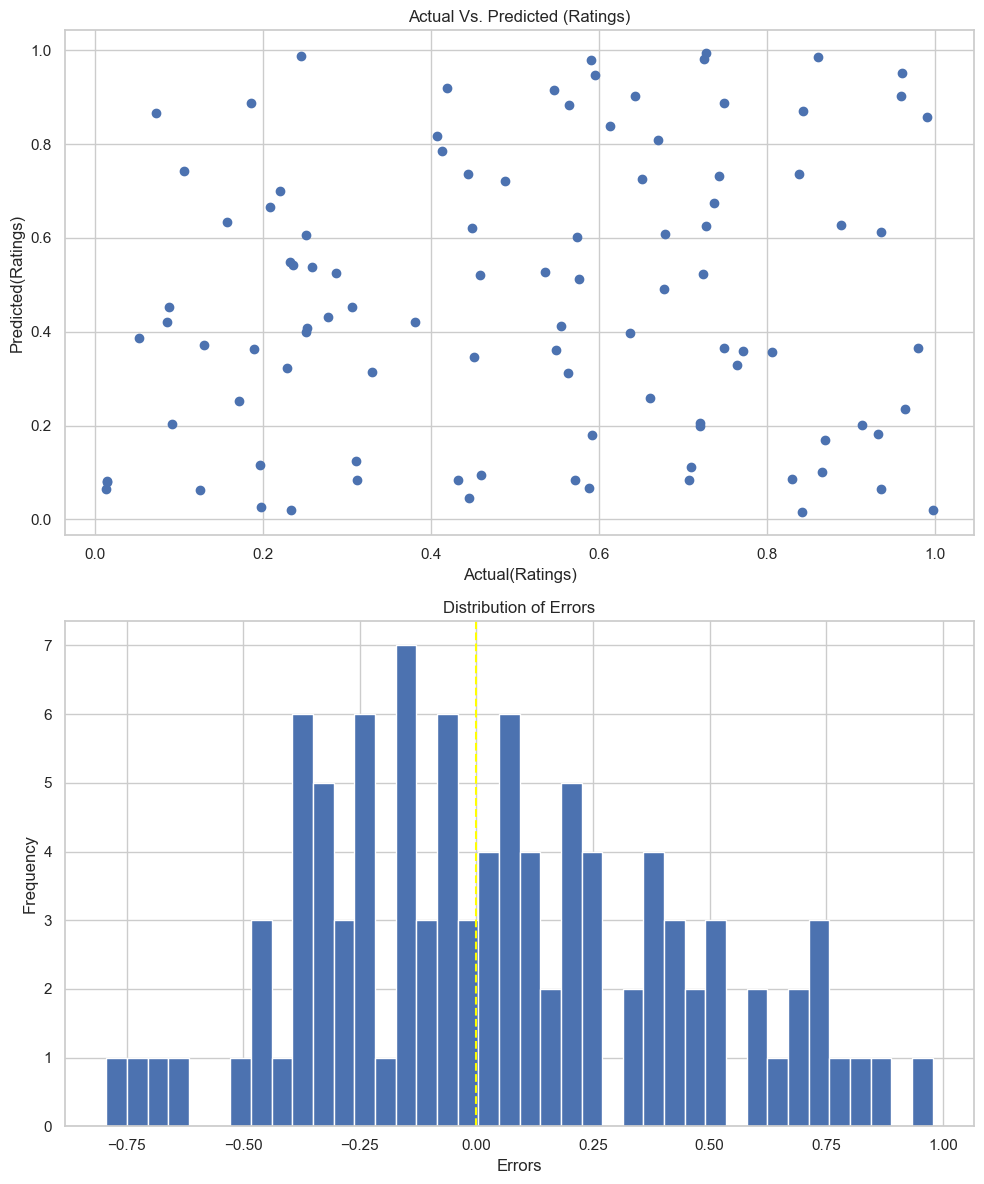

In [33]:
y_test=np.random.rand(100)
y_pred=np.random.rand(100)

errors=y_test-y_pred

fig, axx=pt.subplots(2, 1, figsize=(10, 12))

axx[0].scatter(y_test, y_pred)

axx[0].set_xlabel("Actual(Ratings)")

axx[0].set_ylabel("Predicted(Ratings)")

axx[0].set_title("Actual Vs. Predicted (Ratings)")

axx [1].hist (errors, bins=40)

axx[1].set_xlabel("Errors")

axx[1].set_ylabel("Frequency")

axx[1].set_title("Distribution of Errors")

axx[1].axvline(x=0, color="yellow", linestyle="--")

pt.tight_layout()